<a href="https://colab.research.google.com/github/Govindkaranam/Govind/blob/main/pancreatic_cancer_disease_detection_87_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [41]:
df=pd.read_csv("/content/drive/MyDrive/Projects/NLP/Machine_Learning/Debernardi et al 2020 data.csv")

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preprocessing

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

In [44]:
df.isnull().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

<Axes: xlabel='diagnosis'>

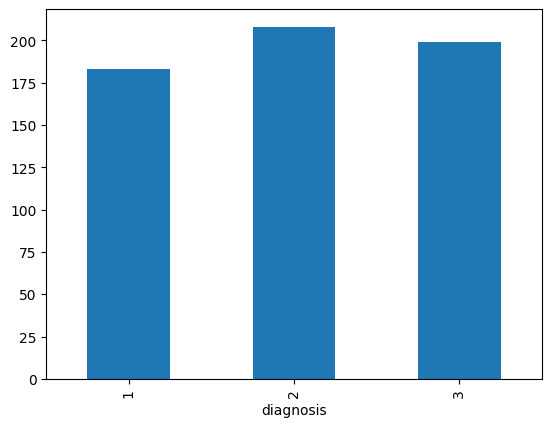

In [45]:
(df.groupby('diagnosis')
   ['sample_id'].nunique()
   .plot.bar()
)

In [46]:
df=df.drop("sample_id",axis=1)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   patient_cohort           590 non-null    object 
 1   sample_origin            590 non-null    object 
 2   age                      590 non-null    int64  
 3   sex                      590 non-null    object 
 4   diagnosis                590 non-null    int64  
 5   stage                    199 non-null    object 
 6   benign_sample_diagnosis  208 non-null    object 
 7   plasma_CA19_9            350 non-null    float64
 8   creatinine               590 non-null    float64
 9   LYVE1                    590 non-null    float64
 10  REG1B                    590 non-null    float64
 11  TFF1                     590 non-null    float64
 12  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 60.0+ KB


In [48]:
df["patient_cohort"].unique()

array(['Cohort1', 'Cohort2'], dtype=object)

In [49]:
#labelencoding and converting to int
# Import label encoder
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()

df['patient_cohort']= label_encoder.fit_transform(df['patient_cohort'])


In [50]:
df['patient_cohort']=df['patient_cohort'].astype(int)

In [51]:
df['sample_origin'].unique()

array(['BPTB', 'LIV', 'ESP', 'UCL'], dtype=object)

In [52]:
df['sample_origin']= label_encoder.fit_transform(df['sample_origin'])
df['sample_origin']=df['sample_origin'].astype(int)

In [53]:
df['sex']= label_encoder.fit_transform(df['sex'])
df['sex']=df['sex'].astype(int)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   patient_cohort           590 non-null    int64  
 1   sample_origin            590 non-null    int64  
 2   age                      590 non-null    int64  
 3   sex                      590 non-null    int64  
 4   diagnosis                590 non-null    int64  
 5   stage                    199 non-null    object 
 6   benign_sample_diagnosis  208 non-null    object 
 7   plasma_CA19_9            350 non-null    float64
 8   creatinine               590 non-null    float64
 9   LYVE1                    590 non-null    float64
 10  REG1B                    590 non-null    float64
 11  TFF1                     590 non-null    float64
 12  REG1A                    306 non-null    float64
dtypes: float64(6), int64(5), object(2)
memory usage: 60.0+ KB


In [55]:
df['diagnosis'].unique()

array([1, 2, 3])

In [56]:
df['stage']=df['stage'].fillna('0')

In [57]:
df['stage'].unique()

array(['0', 'I', 'IA', 'IB', 'II', 'IIA', 'IIB', 'III', 'IV'],
      dtype=object)

In [58]:
df['stage']= label_encoder.fit_transform(df['stage'])
df['stage']=df['stage'].astype(int)

In [59]:
df['benign_sample_diagnosis'].unique()

array([nan, 'Abdominal Pain ', 'Biliary Stricture (Secondary to Stent) ',
       'Cholecystitis', 'Cholecystitis ', 'Cholecystitis (Chronic) ',
       'Cholecystitis (Chronic) Cholelithiasis',
       'Cholecystitis (Chronic) Cholesterolsis', 'Choledochal Cyst ',
       'Choledocholiathiasis', 'Choledocholiathiasis ',
       'Cholelithiasis with adenomyomatous hyperplasia ',
       'Duodenal Stricture', 'Duodenitis', 'Gallbladder polyps ',
       'Gallbladder Porcelain', 'Gallstones', 'Gallstones ',
       'Gallstones - Incidental ', 'Gastritis ', 'Gastritis and Reflux ',
       'Ill defined lesion in uncinate process',
       'Ischaemic Common Bile Duct Stricture',
       'Pancreatitis (Pseudocyst)', 'Pancreatitis', 'Pancreatitis ',
       'Pancreatitis (Abscess)', 'Pancreatitis (Acute)',
       'Pancreatitis (Alcohol-Chronic-Pseuodcyst)',
       'Pancreatitis (Alcohol-Chronic)', 'Pancreatitis (Alcohol)',
       'Pancreatitis (Autoimmune) ', 'Pancreatitis (Chronic-Pseudocyst) ',
      

In [60]:
df['benign_sample_diagnosis']=df['benign_sample_diagnosis'].fillna("null")

In [61]:
df.isnull().sum()

patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                        0
benign_sample_diagnosis      0
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [62]:
df['plasma_CA19_9']=df['plasma_CA19_9'].fillna(df['plasma_CA19_9'].mean())

In [63]:
df['REG1A']=df['REG1A'].fillna(df['REG1A'].mean())

In [64]:
df=df.drop("benign_sample_diagnosis",axis=1)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_cohort  590 non-null    int64  
 1   sample_origin   590 non-null    int64  
 2   age             590 non-null    int64  
 3   sex             590 non-null    int64  
 4   diagnosis       590 non-null    int64  
 5   stage           590 non-null    int64  
 6   plasma_CA19_9   590 non-null    float64
 7   creatinine      590 non-null    float64
 8   LYVE1           590 non-null    float64
 9   REG1B           590 non-null    float64
 10  TFF1            590 non-null    float64
 11  REG1A           590 non-null    float64
dtypes: float64(6), int64(6)
memory usage: 55.4 KB


In [66]:
X=df.drop("diagnosis",axis=1)
y=df['diagnosis']

In [67]:
# Build a Dataframe with Correlation between Features
corr_matrix = X.corr()
# Take absolute values of correlated coefficients
corr_matrix = corr_matrix.abs().unstack()
corr_matrix = corr_matrix.sort_values(ascending=False)
# Take only features with correlation above threshold of 0.8
corr_matrix = corr_matrix[corr_matrix >= 0.8]
corr_matrix = corr_matrix[corr_matrix < 1]
corr_matrix = pd.DataFrame(corr_matrix).reset_index()
corr_matrix.columns = ['feature1', 'feature2', 'Correlation']
corr_matrix.head()

,feature1,feature2,Correlation


In [68]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

y= label_encoder.fit_transform(y)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## LightGBM -Highest Accuracy

In [70]:
from sklearn.metrics import accuracy_score
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)*100))

LightGBM Model accuracy score: 87.6923


In [71]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.8832403832403832, 0.8824074074074074, 0.8827054794520549, None)

## Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred8 = clf.predict(X_test)
 

In [73]:
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print( metrics.accuracy_score(y_test, y_pred8)*100)


87.6923076923077


In [74]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred8, average='macro')

(0.8850499782703173, 0.8814102564102564, 0.8821505376344086, None)

## Extratree classifier

In [75]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100,max_depth=6,min_samples_split=2,min_weight_fraction_leaf =0.0,n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test)*100)
y_pred9 = clf.predict(X_test)

85.12820512820512


In [76]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred9, average='macro')

(0.8663650075414782, 0.8552706552706552, 0.8558077921135245, None)

## Xgboost

In [77]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier(eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print(accuracy*100)

87.17948717948718


In [78]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred1, average='macro')

(0.8795093795093796, 0.8767806267806267, 0.8774049217002237, None)